#### Project Proposal: Group #21

## **Inferential Analysis on the Adoption Time of Dogs and Cats from the Austin Animal Center**
#### _Group Members: Sadia, Youjung, Adam_

First, let's retrieve the necessary packages.

In [1]:
install.packages("infer")
library(infer)
install.packages("cowplot")
library(cowplot)
library(tidyverse)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## **Introduction:**

**Question: How long does it take for cats and dogs to get adopted and are dogs adopted faster than cats are?**

Looking at animal shelter data from Malaysia, it shows that cats are adopted faster than dogs (2.4 vs 2.62 months) (Zhang, 2021). Our group wondered whether this same trend would be repeated in Texas, where dogs outnumber cats (7.2 vs 5.6 million) (Appleby, 2014). We used data from the Austin Animal Center, and considered our population to be all animals ever emitted to this specific shelter.

The datasets we are using are posted on Kaggle and sourced from the Austin Animal Center’s website with data starting from October, 2013. We plan to combine a dataset with animal intake data and another with animal outcome information in order to find the time taken for an animal to get adopted. We will focus on columns `DateTime`, containing intake and adoption dates, as well as `Animal_Type` (cat or dog).

The parameters we will focus on to answer our question are the median, to find and compare average adoption times, and interquartile range, to analyze the spread of data. 




## **Preliminary Results:**

Then, read in the two relevant csv files and use the head function.

In [2]:
#Source of datasets
intakes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Intakes.csv"
outcomes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Outcomes.csv"

#Reading and displaying data sets
animal_intakes <- read_csv(intakes)
head(animal_intakes)

animal_outcomes <- read_csv(outcomes)
head(animal_outcomes)

Rows: 142192 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Found Location, Intake Type,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
A665644,NA,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


Rows: 141980 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Date of Birth, Outcome Type,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NA,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NA,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
A821648,NA,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NA,Other,Unknown,1 year,Raccoon,Gray
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NA,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
A674754,NA,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NA,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown


In order to analyze the datasets, we must first tidy it. This included changing column names, filtering rows, and selecting columns relevant to later analysis. 

<!-- The two datasets had their column names changed to remove spaces and were filtered for the relevant information. For both datasets, Animal Type is filtered to only contain dog and cat while the Animal outcome table was also filtered for the outcome type `Adoption`, as this is the data relevant to our research question. In addition, the `DateTime` field in both tables was renamed, as one refers to the Date when the animal was taken in by the shelter while the other refers to when the animal left the shelter. We then select the relevant columns for each dataset. For the Animal Intake data it was Animal ID, DateTime_Intake, and Animal Type. For the Animal Outcome data it was Animal ID, DateTime_Outcome, and Animal Type. -->

In [3]:
#Renaming columns so that they can be read in R. Column names with spaces cannot be easily read.
names(animal_intakes)<-str_replace_all(names(animal_intakes), c(" " = "_" , "," = "" ))
names(animal_outcomes)<-str_replace_all(names(animal_outcomes), c(" " = "_" , "," = "" ))

#Filtering Intake dataset for useful data and selecting relevant columns
tidy_animal_intakes <- animal_intakes %>%
    filter(Animal_Type%in%c("Dog", "Cat")) %>%
    dplyr::rename(DateTime_Intake = DateTime) %>%
    select(Animal_ID, Animal_Type, DateTime_Intake)

#Filtering Outcome dataset for useful data and selecting relevant columns
tidy_animal_outcomes <- animal_outcomes %>%
    filter(Animal_Type%in%c("Dog", "Cat") & Outcome_Type == "Adoption") %>%
    dplyr::rename(DateTime_Outcome = DateTime) %>%
    select(Animal_ID, DateTime_Outcome)


head(tidy_animal_intakes)
head(tidy_animal_outcomes)

Animal_ID,Animal_Type,DateTime_Intake
<chr>,<chr>,<chr>
A786884,Dog,01/03/2019 04:19:00 PM
A706918,Dog,07/05/2015 12:59:00 PM
A724273,Dog,04/14/2016 06:43:00 PM
A665644,Cat,10/21/2013 07:59:00 AM
A682524,Dog,06/29/2014 10:38:00 AM
A743852,Dog,02/18/2017 12:46:00 PM


Animal_ID,DateTime_Outcome
<chr>,<chr>
A776359,07/18/2018 04:02:00 PM
A720371,02/13/2016 05:59:00 PM
A659412,10/05/2020 02:37:00 PM
A814515,05/06/2020 07:59:00 AM
A689724,10/18/2014 06:52:00 PM
A680969,08/05/2014 04:59:00 PM


To get time spent at the shelter, the two datasets were first combined using Animal_ID, and then filtered.

<!-- Now, with two clean datasets, they can be combined in order to have intake and adoption date information in the same dataset. Afterwards, the dataset will be filtered, removing any rows with DateTime_Outcome as N/A as these animals were not adopted and as such, are not in the focus of our question. (Needs more) -->

In [4]:
#Merge Intake and Outcome Datasets. Using DateTime_Outcome and DateTime_Intake, Shelter_Period was calculated.
adoption_time_data <- merge(tidy_animal_intakes,tidy_animal_outcomes, by="Animal_ID") %>%
    filter(!is.na(DateTime_Outcome)) %>%
    mutate(DateTime_Outcome = as.Date(DateTime_Outcome, format = "%m/%d/%Y"),
          DateTime_Intake = as.Date(DateTime_Intake, format = "%m/%d/%Y"),
          Shelter_Period = as.numeric(difftime(DateTime_Outcome, DateTime_Intake, unit = "days"))) %>%
#Negative numbers were animals returned to the shelter, not relevant to our analysis
    filter(Shelter_Period >= 0) %>%
    select(Animal_Type, Shelter_Period)

head(adoption_time_data)

,Animal_Type,Shelter_Period
,<chr>,<dbl>
1,Dog,50
2,Dog,9
3,Dog,23
4,Dog,90
5,Dog,3
6,Dog,147


**_Table 1: Tidy Dog and Cat Shelter Period Data_**

In order to analyze the data, samples of size 200 were created for dogs and cats. We decided on sample size of 200 because it is a common size taken in real-life studies. 

In [5]:
options(repr.plot.width = 10)
set.seed(310)

# Get datasets filtered by species
adoption_time_data_dog <- adoption_time_data %>%
    filter(Animal_Type == "Dog")

adoption_time_data_cat <- adoption_time_data %>%
    filter(Animal_Type == "Cat")


# Dog: Sample (size 200)
dog_sample_200 <- adoption_time_data_dog %>%
    rep_sample_n(size = 200) 

#Dog: Sample median calculated
sample_dog_median <- dog_sample_200 %>%
    summarize(med = median(Shelter_Period)) %>%
    pull()

sprintf("Dog median for 200 samples: %.2f", sample_dog_median)


#Cat: Sample (size 200)
cat_sample_200 <- adoption_time_data_cat %>%
    rep_sample_n(size = 200) 

#Cat: Sample median calculated
sample_cat_median <- cat_sample_200 %>%
    summarize(med = median(Shelter_Period)) %>%
    pull()

sprintf("Cat median for 200 samples: %.2f", sample_cat_median)

[1] "Dog median for 200 samples: 10.00"

[1] "Cat median for 200 samples: 33.50"

In [6]:
# Dog: Sample200 histogram
options(repr.plot.width = 15)
animal_sample200_dog_dist <- dog_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Dogs spent in Shelter Before Adoption") +
                            geom_vline(xintercept = 10.00, colour = "red")

In [7]:
# Cat: Sample200 histogram
options(repr.plot.width = 15)
animal_sample200_cat_dist <- cat_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Cats spent in Shelter Before Adoption") +
                            geom_vline(xintercept = 33.50, colour = "red")

Below, we plot the distributions together with the median illustrated with the red vertical line.

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


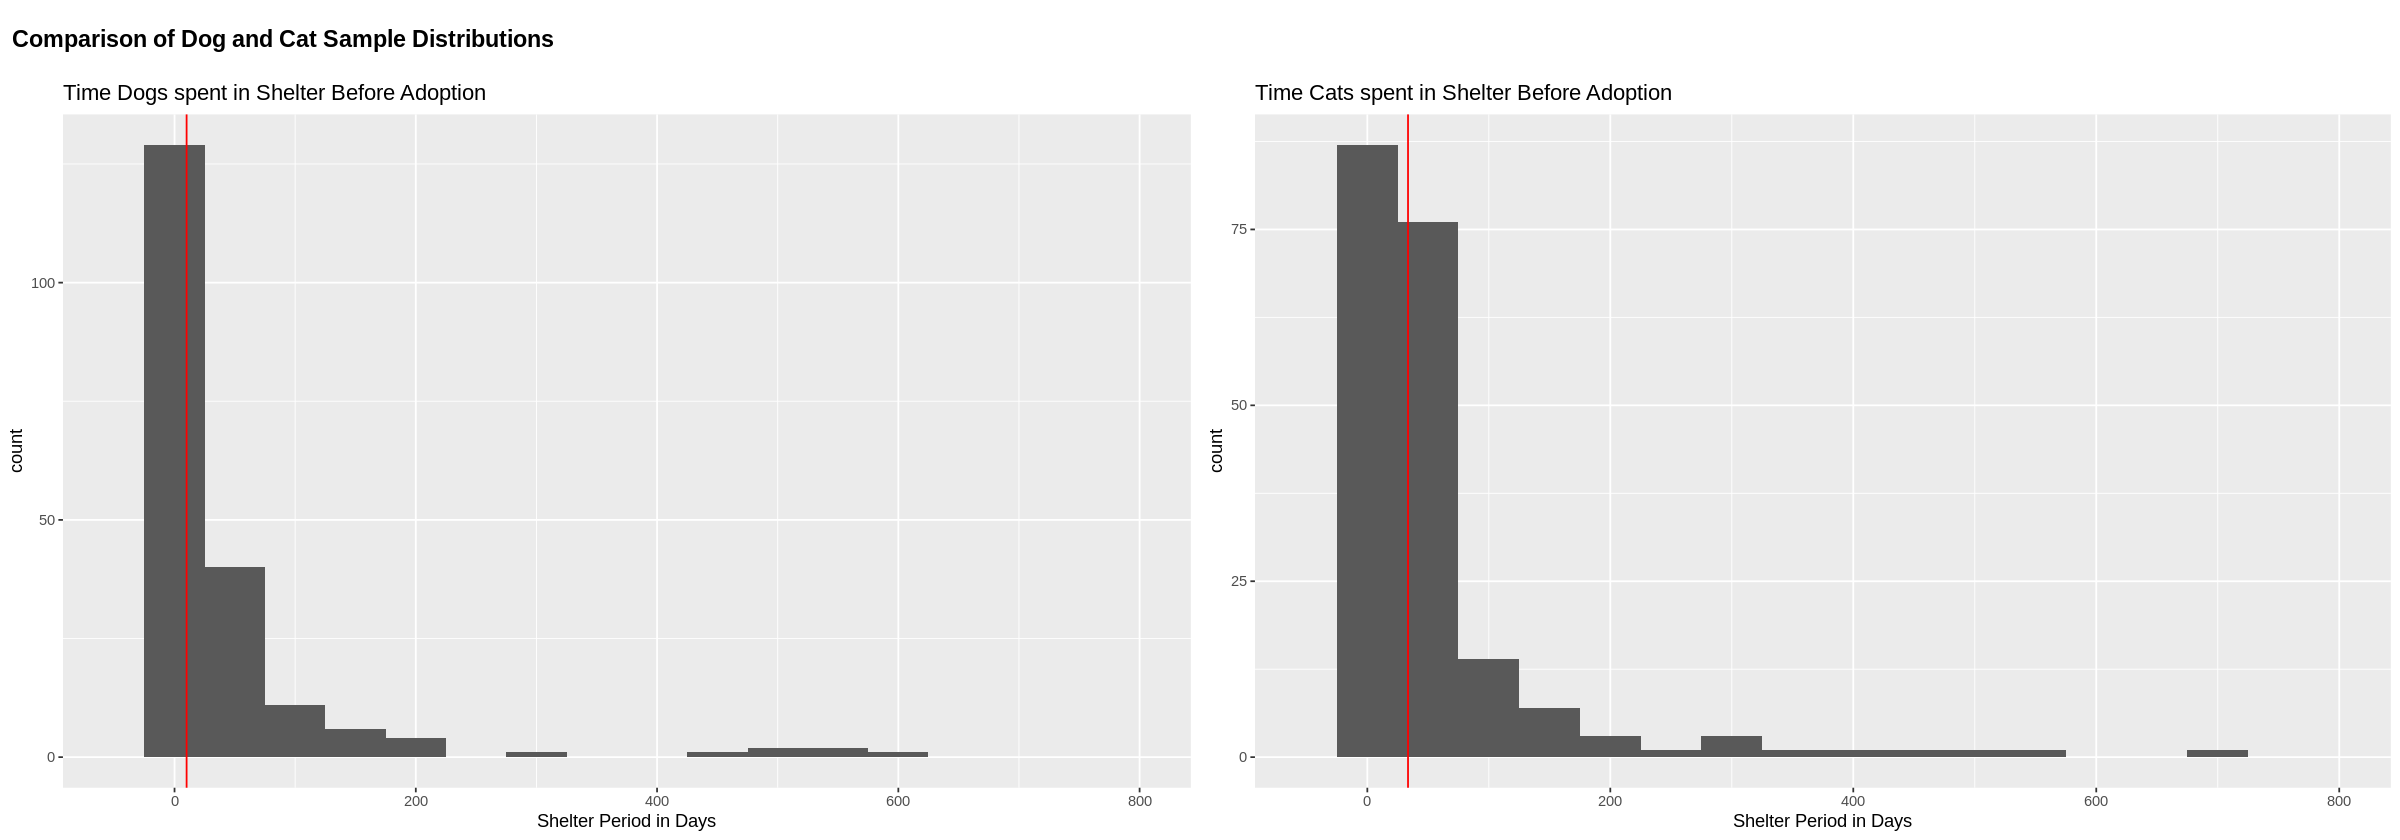

In [8]:
options(repr.plot.width = 20)

#Plotting Cat and Dog histograms side by side
proportion_plot_row <- plot_grid(animal_sample200_dog_dist +
                                 scale_x_continuous(limits = c(-50, 800)),
                                 animal_sample200_cat_dist +
                                 scale_x_continuous(limits = c(-50, 800)),
                                 ncol = 2)

title <- ggdraw() + 
  draw_label("Comparison of Dog and Cat Sample Distributions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

medians_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

#Some points will not be plotted, in order to make comparison clearer
medians_grid

| _Figure 1: Comparing the Distributions of Time spent in Shelter for **Dogs** and **Cats**_|
| ------------------------ |
||

Now, we find the IQR as our measure of spread.

In [9]:
#IQR of Dog Sample
summary(dog_sample_200$Shelter_Period)
sprintf("Dog IQR: %.2f", IQR(dog_sample_200$Shelter_Period))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.00   10.00   63.16   41.00 1404.00 

[1] "Dog IQR: 36.00"

In [10]:
#IQR of Cat Sample
summary(cat_sample_200$Shelter_Period)
sprintf("Cat IQR: %.2f", IQR(cat_sample_200$Shelter_Period))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.75   33.50   74.30   61.00 1914.00 

[1] "Cat IQR: 52.25"

|  Point Estimates        |    Dogs   |   Cats    |
| -------- | --------- | --------- |
| IQR (days)      |  36.00 | 52.25 |
| Median (days)   | 10.00 | 33.50|

| _Table 2: Point Estimates of Population Parameters_ |
| ------------------------ |
||

## **Methods:**

Our report is trustworthy because we took our samples randomly, ensuring that the point estimates we drew were generalized and unbiased, and thus representative of our population. In addition, our sample distributions show that our data is right skewed with outliers. Thus, our choice of median and IQR as parameters is more effective than mean and standard deviation because our parameters are less affected by extreme values. 

Our point estimates show that median time and IQR is higher for cats than for dogs which is the opposite of what we expected to find. However, our estimates alone are not enough to provide reliable findings. We will use bootstrapping with confidence intervals to find a range of values for the median and IQR, as well as hypothesis testing to more accurately deduce whether dogs are truly adopted faster than cats are. 

Our findings impact how shelters choose to set up their environments and may cause shelters to push for cats to get adopted more than dogs. Other questions like which other characteristics affect the period of staying in the shelter, a few being age, sex, colour, or health, are raised.

Word Count: 498

## **References:**

Daoud, J. (2021, March 4). Animal Shelter Analytics. Kaggle. https://www.kaggle.com/datasets/jackdaoud/animal-shelter-analytics

AustinTexas.gov. (n.d.). Austin Animal Center. https://www.austintexas.gov/austin-animal-center

Zhang, E. (2021, December 15). Predicting Adoption Speed for PetFinder - Towards Data Science. Medium. https://towardsdatascience.com/predicting-adoption-speed-for-petfinder-bb4d5befb78c

Appleby, N. (2014, August 3). Dogs vs. cats states: See which pet Texas loves better and other stats. CultureMap Houston. https://houston.culturemap.com/news/city-life/08-03-14-dog-and-cat-states-see-which-pet-texas-loves-better-and-the-surprise-stats-for-the-other-49-states
